In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Egypt_Houses_Price.csv')

In [ ]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [ ]:
df.keys()


Index(['Type', 'Price', 'Bedrooms', 'Bathrooms', 'Area', 'Furnished', 'Level',
       'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City'],
      dtype='object')

In [ ]:

df=df.drop_duplicates()
df.isnull().sum()



Type                0
Price               2
Bedrooms          200
Bathrooms         168
Area              465
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

<ipython-input-112-79c3861c8fef>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

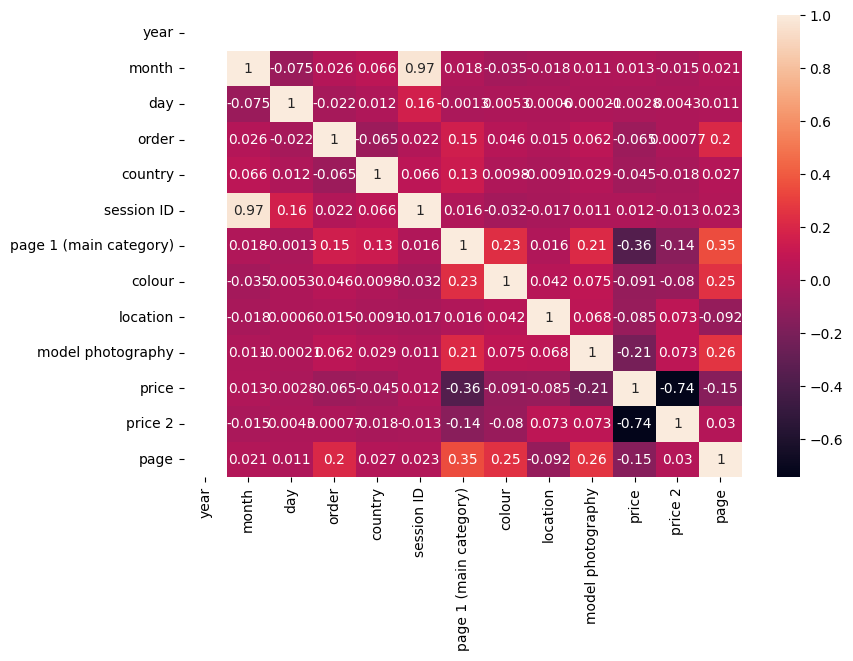

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True)


In [ ]:
df_max_scaled = df.copy()
for column in df_max_scaled.columns:
  if pd.api.types.is_numeric_dtype(df_max_scaled[column]):
      df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()


In [ ]:
df_max_scaled.cov()

<ipython-input-114-c622307847fe>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_max_scaled.cov()


,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
year,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month,0.0,0.027563,-0.003551,0.000299,0.001654,0.047022,0.000834,-0.001772,-0.000840,0.000404,0.000323,-0.000608,0.000682
day,0.0,-0.003551,0.081140,-0.000428,0.000501,0.013408,-0.000102,0.000458,0.000048,-0.000013,-0.000123,0.000303,0.000623
order,0.0,0.000299,-0.000428,0.004778,-0.000680,0.000440,0.003000,0.000971,0.000293,0.000937,-0.000685,0.000013,0.002772
country,0.0,0.001654,0.000501,-0.000680,0.023147,0.002923,0.005781,0.000451,-0.000394,0.000959,-0.001056,-0.000667,0.000798
session ID,0.0,0.047022,0.013408,0.000440,0.002923,0.085090,0.001346,-0.002827,-0.001393,0.000677,0.000521,-0.000929,0.001333
page 1 (main category),0.0,0.000834,-0.000102,0.003000,0.005781,0.001346,0.081856,0.019959,0.001302,0.013374,-0.015971,-0.009864,0.019562
colour,0.0,-0.001772,0.000458,0.000971,0.000451,-0.002827,0.019959,0.091532,0.003634,0.004961,-0.004220,-0.006060,0.014821
location,0.0,-0.000840,0.000048,0.000293,-0.000394,-0.001393,0.001302,0.003634,0.081530,0.004239,-0.003699,0.005223,-0.005154
model photography,0.0,0.000404,-0.000013,0.000937,0.000959,0.000677,0.013374,0.004961,0.004239,0.048109,-0.007129,0.003999,0.011132


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
fit = pca.fit(df.select_dtypes(include='number'))
print(("Explained Variance: %s") % fit.explained_variance_ratio_)
print(fit.components_)


Explained Variance: [9.99990033e-01 3.79335085e-06 3.13385233e-06 1.54631256e-06
 1.02648995e-06]
[[-0.00000000e+00 -1.84006075e-04 -2.03319705e-04 -4.19817369e-05
  -6.72057788e-05 -9.99999959e-01 -2.63277015e-06  1.93601177e-05
   4.08744612e-06 -6.62548794e-07 -2.08932925e-05  9.08775871e-07
  -3.25966539e-06]
 [-0.00000000e+00  7.32805170e-04 -2.36005516e-02  9.30993911e-01
  -3.25609802e-02 -2.42934140e-05  2.19687738e-02  2.53399747e-02
   5.40082675e-03  4.11797531e-03 -3.60666538e-01  9.05233975e-03
   1.73041263e-02]
 [ 0.00000000e+00  6.99461716e-04 -2.02776205e-02  3.59389359e-01
  -5.99583086e-02 -2.69752239e-05 -2.70493518e-02 -2.63505315e-02
  -1.03779347e-02 -6.30961475e-03  9.29752313e-01 -2.81392124e-02
  -5.28275289e-03]
 [ 0.00000000e+00 -3.57633537e-02  9.98837227e-01  2.89237336e-02
  -6.68045726e-03 -1.97347852e-04 -3.26954869e-04  7.22558145e-03
   5.98535504e-04 -1.11875536e-04  1.04026366e-02 -2.79768368e-04
   1.71638378e-03]
 [ 0.00000000e+00 -1.47972246e-04 